**请填写你的姓名与学号**

In [1]:
name="康凯"
student_id="23009200942"

# 线性回归模型编程练习

In [2]:
import os
print(os.listdir('.'))

['.ipynb_checkpoints', 'environment.yml', 'fit.png', 'linear-regression.ipynb', 'PRML_LR_data.txt', 'scatter.png']


In [3]:
# 查看个人持久化工作区文件
#!ls
!dir  # Windows 环境

 ������ E �еľ��� �¼Ӿ�
 �������к��� 0007-73B7

 e:\ai\01LearnByDoing\python\dlml\PRML-HW25F01 ��Ŀ¼


 e:\ai\01LearnByDoing\python\dlml\PRML-HW25F01 ��Ŀ¼


 e:\ai\01LearnByDoing\python\dlml\PRML-HW25F01 ��Ŀ¼



�Ҳ����ļ�


## 线性回归模型

回归问题是非常常见的一类问题，目的是寻找变量之间的关系。比如要从数据中寻找房屋面积与价格的关系，年龄和身高的关系，气体压力和体积的关系等等。而机器学习要做的正是要让机器自己来学习这些关系，并为对未知的情况做出预测。

对于线性回归，假设变量之间的关系是线性的，即：
$$h_{\theta}(x)= \theta_{0} + \theta_{1} x$$
其中 $\pmb{\theta}$ 就是学习算法需要学习的参数，在线性回归的问题上，就是$\theta_{1}$和$\theta_{0}$，而 $x$ 是我们对于问题所选取的特征，也即输入。$h$表示算法得到的映射。

## 代价函数的表示

为了找到这个算法中合适的参数，我们需要制定一个标准。一般而言算法拟合出来的结果与真实的结果误差越小越好，试想一下如果算法拟合出来的结果与真实值的误差为零，那么就是说算法完美地拟合了数据。所以可以根据“真实值与算法拟合值的误差”来表示算法的“合适程度”。在线性回归中，我们经常使用最小二乘的思路构建代价函数：
$$J(\pmb{\theta}) = \frac{1}{2n}\sum_{i=1}^{n} \Big( h_{\theta}(x^{(i)}) - y^{(i)} \Big)^2$$
这里 $h_{\theta}(x^{(i)})$ 由假设模型得出。对线性回归任务，代价函数可以展开为：
$$J(\pmb{\theta}) = \frac{1}{2n}\sum_{i=1}^{n} \Big( {\theta}_0+{\theta}_1 x^{(i)} - y^{(i)} \Big)^2$$
误差函数的值越小，则代表算法拟合结果与真实结果越接近。



## 梯度下降

梯度下降算法沿着误差函数的反向更新$\theta$的值，直到代价函数收敛到最小值。梯度下降算法更新$\theta_i$的方法为：
$$\theta_{j} = \theta_{j} - \alpha\frac{\partial }{\partial \theta_{j}}J(\pmb{\theta}), \qquad j=0, 1$$
其中 $\alpha$表示学习率。对于线性回归的的参数，可以根据代价函数求出其参数更新公式：
$$\begin{split}\frac{\partial J}{\partial \theta_{0} } &= \frac{1}{n}\sum_{i=1}^{n} \Big(h_{\theta}(x^{(i)}) - y^{(i)}\Big),\\
\frac{\partial J}{\partial \theta_{1} } &= \frac{1}{n}\sum_{i=1}^{n} \Big(h_{\theta}(x^{(i)}) - y^{(i)}\Big) \cdot x^{(i)}.\end{split}$$

## 代码实现
现在让我们开始动手实现，首先让我们回顾一下numpy和matplotlib：

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def warm_up_exercise():
    """热身练习"""
    A = None
    A = np.ones((5,5))
    return A

# 当你的实现正确时，下面会输出一个单位矩阵：
print(warm_up_exercise())

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


你需要实现绘制数据集中图像的函数，当你的实现|正确时，你应该会得到如下的图像：
![散点图](./scatter.png)

Plotting Data ...



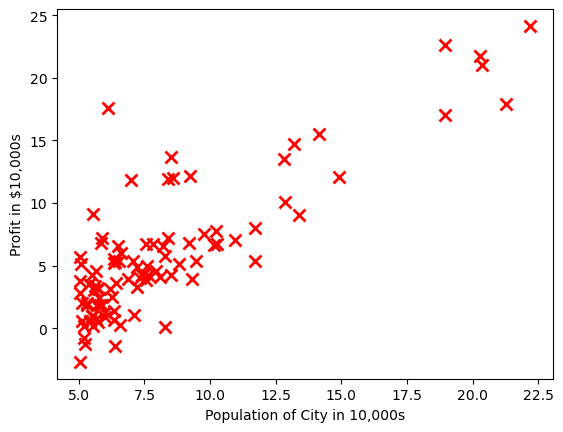

In [5]:
def plot_data(x, y):
    """绘制给定数据x与y的图像"""
    plt.figure()
    plt.plot(x,y,'rx',markersize=8, markeredgewidth=2)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.show()
    
# 让我们测试一下你的实现是否正确
# 从txt中加载数据
print('Plotting Data ...\n')
data = np.loadtxt('./PRML_LR_data.txt', delimiter=',')
x, y = data[:, 0], data[:, 1]

# 绘图
plot_data(x, y)
plt.show()

现在运用所学的知识，对上述数据利用线性回归进行拟合。首先我们对要学习的参数和数据做一个准备:

In [6]:
# Add a column of ones to x
m = len(y)
X = np.ones((m, 2))
X[:, 1] = data[:, 0]
print(X.shape)
# initialize fitting parameters
theta = np.zeros((2, 1))
print(theta.shape)
# Some gradient descent settings
iterations = 1500
alpha = 0.01

(97, 2)
(2, 1)


计算初始误差函数的值，你需要实现误差函数的计算：

In [7]:
def compute_cost(X, y, theta):
    """计算线性回归的代价。"""
    m = len(y)
    J = 0.0
    predict = X @ theta #(m,1)
    error = predict - y.reshape(m,1)  #y的形状(m,) 为了避免广播机制，调整下维度
    #print(error.shape)
    error_2 = error ** 2
    J = np.sum(error_2) /(2*m)
    return J

# compute and display initial cost
# Expected value 32.07
J0 = compute_cost(X, y, theta)
print(J0)


32.072733877455676


现在你验证了代价计算的正确性，接下来就需要实现最核心的部分：梯度下降。在实现这一部分之前，确定你理解了上述各种变量及其表示。你需要完成梯度下降的核心代码部分：

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """执行梯度下降算法来学习参数 theta。"""
    m = len(y)
    J_history = np.zeros((num_iters,))

    for iter in range(num_iters):
        
        error = X@theta - y.reshape(m,1)
        grad = X.T @ error
        #print(grad.shape)
        theta = theta - alpha*(1/m)*grad
        J_history[iter] = compute_cost(X, y, theta)

    return theta, J_history

# run gradient descent
# Expected value: theta = [-3.630291, 1.166362]
theta, J_history = gradient_descent(X, y, theta,
                                    alpha, iterations)
print(theta)
print(J_history)

[[-3.63029144]
 [ 1.16636235]]
[6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


为了验证梯度下降方法实现的正确性，你需要把学习的到的直线绘制出来，确定你的实现是否正确。前面你已经绘制了数据集中的点，现在你需要在点的基础上绘制一条直线，如果你的实现正确，那么得到的图像如下：

![拟合结果](./fit.png)

现在你已经正确实现了线性回归，你可能会对误差函数的优化过程比较好奇。为了更好地理解这个过程，你可以将损失函数的图像绘制出来。为此你需要将需要优化的参数的各个取值时误差函数的取值在图像上绘制出来，以下代码需要你进行填写。

绘制直线：

Plotting Data ...



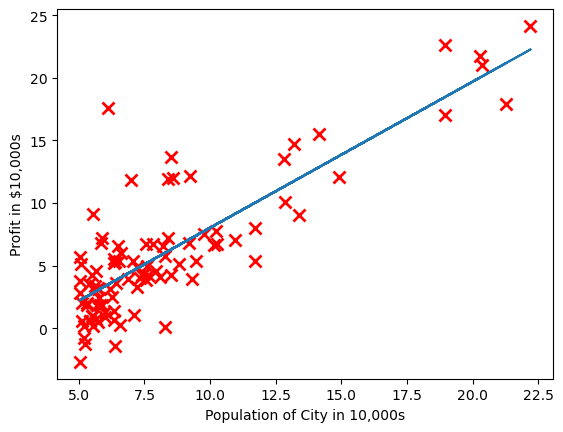

In [9]:
def plot_data_2(x, y, theta):
    """绘制给定数据x与y的图像"""
    plt.figure()
    plt.plot(x,y,'rx',markersize=8, markeredgewidth=2)
    #我们自己构造直线
    m = len(x)
    X = np.ones((m,2))
    X[:,1] = x 
    Y = X @ theta
    plt.plot(x,Y,'-')
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    
    plt.show()
    

print('Plotting Data ...\n')
# 绘图
plot_data_2(x, y, theta)
plt.show()

损失函数绘图：

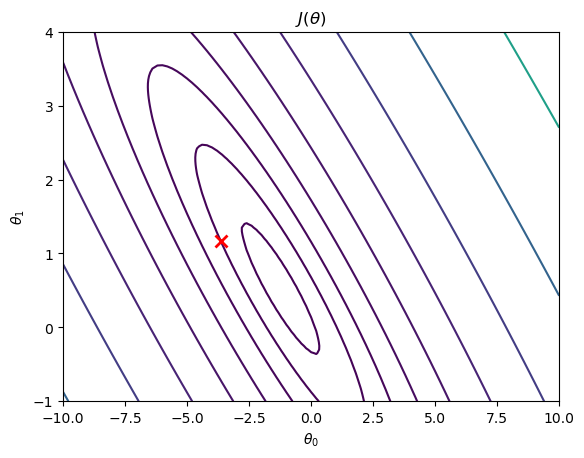

In [10]:
def plot_visualize_cost(X, y, theta_best):
    """可视化代价函数"""

    # 生成参数网格
    theta0_vals = np.linspace(-10, 10, 101)
    theta1_vals = np.linspace(-1, 4, 101)
    t = np.zeros((2, 1))
    J_vals = np.zeros((101, 101))
    for i in range(101):
        for j in range(101):

            theta = [[theta0_vals[i]],[theta1_vals[j]]] #保持[2,1]的维度
            J_vals[i][j] = compute_cost(X,y,theta)

    plt.figure()
    plt.contour(theta0_vals, theta1_vals, J_vals,
                levels=np.logspace(-2, 3, 21))
    plt.plot(theta_best[0], theta_best[1], 'rx',
             markersize=8, markeredgewidth=2)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(r'$J(\theta)$')
  

plot_visualize_cost(X, y, theta)
plt.show()

在梯度更新时，我们保留了代价的历史信息。在参数的学习过程中，代价函数的变化过程你也可以作一个图来查看。观察最后得到的$J(\theta)$的图像以及代价的变化过程，可以加深你的理解。在梯度下降的迭代中，我们设置终止条件为完成了固定的迭代次数，但是在迭代次数完成时，由于学习率等参数的设置，可能得到的参数并不是使得代价最低的值。你可以通过观察代价函数的变化过程，想办法调整学习率等参数或者改进程序，使得参数的取值为搜索到的最优结果。改进`plot_visualize_cost`绘制模型迭代优化历史。

---


首先，我利用我们记录的代价历史，去绘制一下代价的变化过程

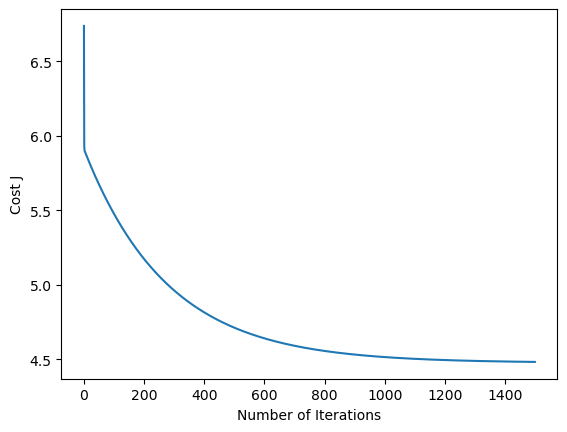

In [11]:
def plot_cost_history(history, num_iterations):

    plt.figure()  
    x_axis = np.arange(num_iterations)
    plt.plot(x_axis, history)
    plt.xlabel('Number of Iterations') 
    plt.ylabel('Cost J')                
       
    


plot_cost_history(J_history, iterations)
plt.show()

为了实现plot_visualize_cost的绘制，我们还应记录theta历史，故先修改一下之前的梯度下降函数

In [12]:
def gradient_descent_with_history(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,))
    theta_history = [] 
    for iter in range(num_iters):
        error = X @ theta - y.reshape(-1, 1)
        grad = X.T @ error
        theta = theta - alpha * (1 / m) * grad
        
        theta_history.append(theta.copy()) 
        J_history[iter] = compute_cost(X, y, theta)

    return theta, J_history, theta_history 

In [13]:
initial_theta = np.zeros((2, 1)) #重新定义一下theta
iterations = 1500
alpha = 0.01

final_theta, J_history, theta_history = gradient_descent_with_history(X, y, initial_theta, alpha, iterations)

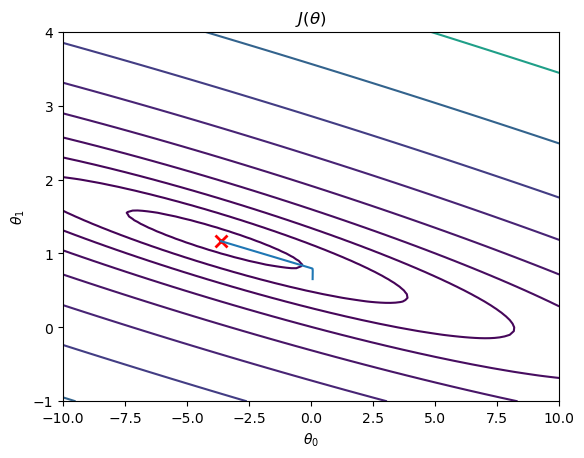

In [14]:
def plot_visual_history(X, y, best_theta, history):
    plt.figure()
    # =============== 你的代码 ===================
    theta0_vals = np.linspace(-10, 10, 101)
    theta1_vals = np.linspace(-1,4,101)
    J_vals = np.zeros((101,101))

    for i in range(101):
        for j in range(101):
            t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
            J_vals[j, i] = compute_cost(X, y, t)
    plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 21))
    
    plt.plot(best_theta[0], best_theta[1], 'rx', markersize=8, markeredgewidth=2)

    history_array = np.array(history)
    theta0_history = history_array[:, 0, 0]
    theta1_history = history_array[:, 1, 0]
    plt.plot(theta0_history, theta1_history, '-')


    # ===========================================
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(r'$J(\theta)$')
    

plot_visual_history(X, y, final_theta, theta_history)
plt.show()

### 进阶
在实现中，你可能采取了像上面公式中给出的结果一样逐个样本计算代价函数，或者在梯度下降的更新时也采用了逐个样本计算的方式。但事实上，你可以采用numpy的矩阵函数一次性计算所有样本的代价函数。可以采用矩阵乘法(np.matmul())求和等方式（np.sum（））。利用你学到的线性代数知识，将其实现更改一下吧。

在梯度更新时，我们保留了代价的历史信息。在参数的学习过程中，代价函数的变化过程你也可以作一个图来查看。观察最后得到的$J(\theta)$的图像以及代价的变化过程，可以加深你的理解。在梯度下降的迭代中，我们设置终止条件为完成了固定的迭代次数，但是在迭代次数完成时，由于学习率等参数的设置，可能得到的参数并不是使得代价最低的值。你可以通过观察代价函数的变化过程，想办法调整学习率等参数或者改进程序，使得参数的取值为搜索到的最优结果。

---

## numpy的使用
在之前，我已经使用了numpy。
如果不使用numpy，
- 在计算prediction时，
    就是for循环下，一个一个的计算prediction
    
    `prediction_i = theta[0] * X[i, 0] + theta[1] * X[i, 1]`

    一个一个地累积误差

    `total_error += error_i`
- 在计算梯度时：
    就要在for循环内分别累加俩个参数的梯度，如
    `sum_of_errors_0 += error_i * X[i, 0]`

    `sum_of_errors_1 += error_i * X[i, 1]`

    在for循环外，分别更新俩个参数
    
    ` theta[0] = theta[0] - alpha * (1/m) * sum_of_errors_0`
    
    `theta[1] = theta[1] - alpha * (1/m) * sum_of_errors_1`
    
    
下面回顾一下numpy的向量化的应用

In [15]:
def compute_cost_numpy(X, y, theta):
    m = len(y)
    #计算所有样本的预测值
    predictions = X @ theta
    #计算所有样本的误差
    errors = predictions - y
    #计算总平方误差
    J = np.sum(errors ** 2) / (2 * m)
    return J

def gradient_descent_numpy(X, y, theta, alpha, num_iters):
    # ...
    for iter in range(num_iters):
        #计算所有样本的误差向量
        errors = X @ theta - y.reshape(m,1)
        #计算包含所有参数的梯度向量
        gradient = X.T @ errors
        #更新整个theta向量
        theta = theta - alpha * (1/m) * gradient

## 最优学习率的寻找

In [16]:
new_theta = np.zeros((2, 1))  #重新定义一下theta
iterations = 1500
initial_alpha = 0.024


In [17]:
def gradient_descent_with_history_plus(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    theta_history = [] 

    for iter in range(num_iters):
        
        error = X @ theta - y.reshape(-1, 1)
        grad = X.T @ error       
        theta = theta - alpha * (1 / m) * grad
        
        current_cost = compute_cost(X, y, theta)
        J_history.append(current_cost)
        theta_history.append(theta.copy())
        
       

    return theta, J_history, theta_history 



尽管老师要求固定1500的迭代次数，我还是想看一下我们这个损失是否够低（虽然通过之前的图能看出够低了）

In [18]:
final_theta_2, J_history_2, theta_history_2 = gradient_descent_with_history_plus(X, y, new_theta, 0.01, 30000)

In [19]:
print(J_history[-1])
print(J_history_2[-1])

4.483388256587726
4.476971375975179


我们选用了三万步，是原来步长的20倍，但结果没有优化很多，那确实，学习率比步长一定更值得调整

下面我手动粗略地调参，尝试找找边界在哪里

In [20]:
final_theta_2, J_history_2, theta_history_2 = gradient_descent_with_history_plus(X, y, new_theta, 0.008, iterations)

In [21]:
print(J_history[-1])
print(J_history_2[-1])

4.483388256587726
4.49592977624766


In [22]:
final_theta_2, J_history_2, theta_history_2 = gradient_descent_with_history_plus(X, y, new_theta, 0.02, 30000)

In [23]:
print(J_history[-1])
print(J_history_2[-1])

4.483388256587726
4.476971375975179


In [24]:
final_theta_2, J_history_2, theta_history_2 = gradient_descent_with_history_plus(X, y, new_theta, 0.025, iterations)

In [25]:
print(J_history[-1])
print(J_history_2[-1])

4.483388256587726
8.052986857343285e+71


可以看到，小于0.01损失倾向于变大，接近0.02损失倾向于变小，但是0.025直接损失剧烈飙升，应该是学习率太大，步子迈太大，无法收敛

那我们就把区间定在0.01到0.0255 步长就设置为0.0005 去找一下最优的学习率

In [26]:
import numpy as np


alpha_candidates = np.arange(0.01, 0.0255, 0.0005) 


# 创建一个字典来存储我们的实验结果，格式为 {alpha: final_cost}
results = {}

for alpha_test in alpha_candidates:
    # 每次循环都必须从同一个干净的起点开始，我们要重复新实验
    new_theta = np.zeros((2, 1)) 
     
    final_theta_search, J_history_search, _ = gradient_descent_with_history_plus(
        X, y, new_theta, alpha_test, iterations
    )
       
    final_cost = J_history_search[-1]
    
    results[alpha_test] = final_cost

    # 打印过程，方便我们实时观察
    print(f"学习率: {alpha_test:.4f} -> 损失: {final_cost:.6f}")


best_alpha, min_cost = min(results.items(), key=lambda item: item[1])

print("\n--实验结果如下--")
print(f"最优学习率: {best_alpha:.4f}")
print(f"最优学习率下的损失: {min_cost:.6f}")

学习率: 0.0100 -> 损失: 4.483388
学习率: 0.0105 -> 损失: 4.481866
学习率: 0.0110 -> 损失: 4.480704
学习率: 0.0115 -> 损失: 4.479818
学习率: 0.0120 -> 损失: 4.479142
学习率: 0.0125 -> 损失: 4.478627
学习率: 0.0130 -> 损失: 4.478234
学习率: 0.0135 -> 损失: 4.477934
学习率: 0.0140 -> 损失: 4.477706
学习率: 0.0145 -> 损失: 4.477531
学习率: 0.0150 -> 损失: 4.477398
学习率: 0.0155 -> 损失: 4.477297
学习率: 0.0160 -> 损失: 4.477220
学习率: 0.0165 -> 损失: 4.477161
学习率: 0.0170 -> 损失: 4.477116
学习率: 0.0175 -> 损失: 4.477081
学习率: 0.0180 -> 损失: 4.477055
学习率: 0.0185 -> 损失: 4.477035
学习率: 0.0190 -> 损失: 4.477020
学习率: 0.0195 -> 损失: 4.477009
学习率: 0.0200 -> 损失: 4.477000
学习率: 0.0205 -> 损失: 4.476993
学习率: 0.0210 -> 损失: 4.476988
学习率: 0.0215 -> 损失: 4.476984
学习率: 0.0220 -> 损失: 4.476981
学习率: 0.0225 -> 损失: 4.476979
学习率: 0.0230 -> 损失: 4.476977
学习率: 0.0235 -> 损失: 4.476976
学习率: 0.0240 -> 损失: 4.476975
学习率: 0.0245 -> 损失: 140722172655045967872.000000
学习率: 0.0250 -> 损失: 805298685737173770249434506242924748285621225652812763807666129357242368.000000

--实验结果如下--
最优学习率: 0.0240
最优学习率下的损失: 4.47

In [27]:
final_theta_2, J_history_2, theta_history_2 = gradient_descent_with_history_plus(X, y, new_theta, 0.024, iterations)

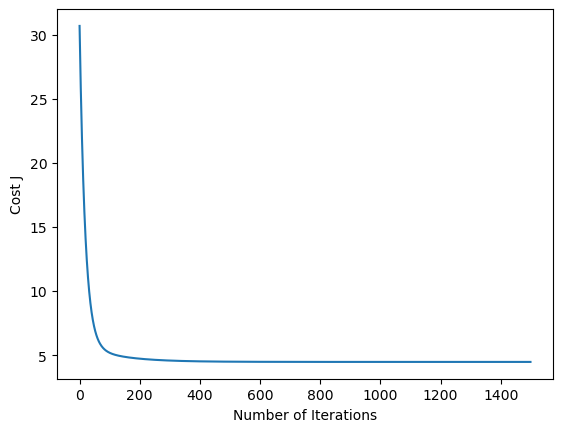

In [28]:
plot_cost_history(J_history_2, len(J_history_2))
plt.show()

## 特征工程

In [29]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [30]:
def gradient_descent_with_history_plus2(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    theta_history = [] 
    
    X_scaled = X.copy()
    
    mu = X_scaled[:,1].mean()
    sigma = X_scaled[:,1].std()
    X_scaled[:, 1] = (X_scaled[:,1] - mu) / sigma

    for iter in range(num_iters):
        
        error = X_scaled @ theta - y.reshape(-1, 1)
        grad = X_scaled.T @ error       
        theta = theta - alpha * (1 / m) * grad
        
        current_cost = compute_cost(X_scaled, y, theta)
        J_history.append(current_cost)
        theta_history.append(theta.copy())
        
       

    return theta, J_history, theta_history 

In [31]:
new_theta = np.zeros((2, 1))  #重新定义一下theta
iterations = 1500
initial_alpha = 0.01


In [32]:
final_theta_3, J_history_3, theta_history_3 = gradient_descent_with_history_plus2(X,y,new_theta,initial_alpha,iterations)

In [33]:
print(J_history[-1])
print(J_history_3[-1])

4.483388256587726
4.476971375977399


哇！ 我们做了特征工程后，原本并不是最优的学习率0.01，最后损失仍然收敛到了最优损失。

In [34]:
final_theta_3, J_history_3, theta_history_3 = gradient_descent_with_history_plus2(X,y,new_theta,0.1,iterations)

In [35]:
print(J_history[-1])
print(J_history_3[-1])

4.483388256587726
4.476971375975179


斗胆使用了0.1的学习率，学习率增大了10倍，模型的学习曲线依然能够完美地、并且更快地下降和收敛！
这个图，是比jhistory1，Jhistory2都好的！

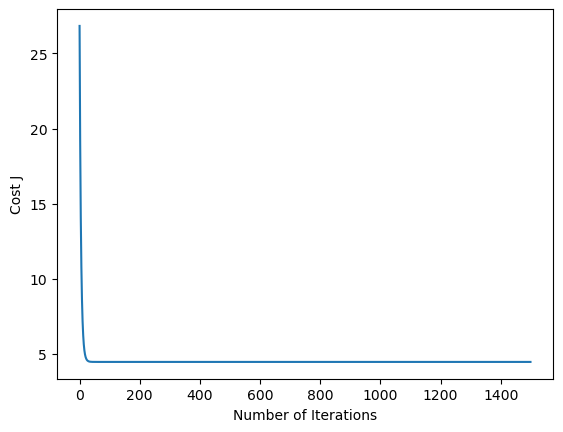

In [36]:
plot_cost_history(J_history_3, len(J_history_3))
plt.show()

## Adam思想

深度学习的Optimizer，常常使用Adam，AdamW算法
我想尝试一下，再更简单的线性回归下，Adam表现如何呢

学习率0.01,步数1500下的损失: 4.490049938148537


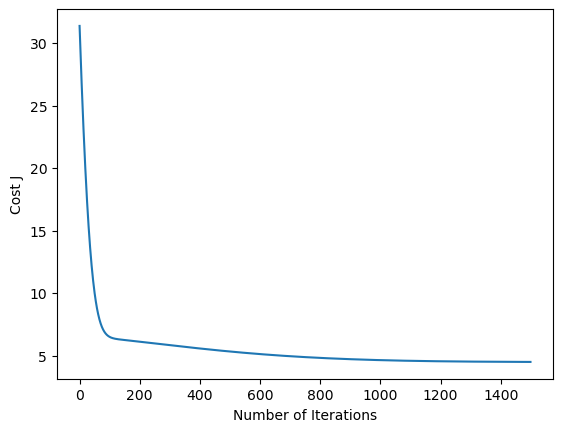

In [37]:
def gradient_descent_with_adam(X, y, theta, alpha, num_iters, 
                               beta1=0.9, beta2=0.999, epsilon=1e-8):

    m = len(y)
    J_history = []
    theta_history = []
    
   
    # v 和 s 的形状必须和 theta 一样
    v = np.zeros_like(theta)
    s = np.zeros_like(theta)

    for iter in range(num_iters):
        t = iter + 1 
        
        # 1. 计算梯度 (和之前一样)
        error = X @ theta - y.reshape(-1, 1)
        grad = (1 / m) * X.T @ error  
        
        # 2. 更新动量项 v (带偏差)
        v = beta1 * v + (1 - beta1) * grad
        
        # 3. 更新RMSProp项 s (带偏差)
        s = beta2 * s + (1 - beta2) * (grad ** 2)
        
        # 4. 修正 v 的偏差
        v_corrected = v / (1 - beta1 ** t)
        
        # 5. 修正 s 的偏差
        s_corrected = s / (1 - beta2 ** t)
        
        # 6. 最终更新 theta
        theta = theta - alpha * v_corrected / (np.sqrt(s_corrected) + epsilon)
        
        
        current_cost = compute_cost(X, y, theta)
        J_history.append(current_cost)
        theta_history.append(theta.copy())
        
    return theta, J_history, theta_history


new_theta = np.zeros((2, 1))

# 2. 设置Adam的超参数 
adam_alpha = 0.01 
iterations = 1500

final_theta_adam, J_history_adam, theta_history_adam = gradient_descent_with_adam(
    X, y, new_theta, adam_alpha, iterations
)


print(f"学习率{adam_alpha},步数{iterations}下的损失: {J_history_adam[-1]}")
plot_cost_history(J_history_adam, len(J_history_adam))
plt.show()

我们再对比一下纯梯度下降

4.483388256587726


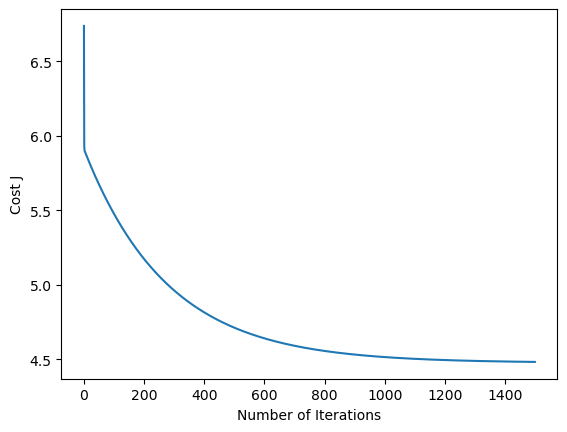

In [38]:
new_theta = np.zeros((2, 1))

alpha = 0.01 
iterations = 1500

def gradient_descent(X, y, theta, alpha, num_iters):
    """执行梯度下降算法来学习参数 theta。"""
    m = len(y)
    J_history = np.zeros((num_iters,))

    for iter in range(num_iters):
        
        error = X@theta - y.reshape(m,1)
        grad = X.T @ error
        #print(grad.shape)
        theta = theta - alpha*(1/m)*grad
        J_history[iter] = compute_cost(X, y, theta)

    return theta, J_history

theta, J_history = gradient_descent(X, y, new_theta,
                                    alpha, iterations)
print(J_history[-1])
plot_cost_history(J_history, iterations)
plt.show()


可以看到，损失虽然甚至没有纯梯度下降收敛的好，但是仍然是下降更快的。不过在本次任务中，没有特征工程快。
也许
- 数据>算法
- 算法>调参
- 调参，榨干模型最后一点性能的手段